## Table of Contents
1.  [Problem statement](#1.-Problem_Statement)

    1.1  [Data](#1.1-Attribute_Information:)   
    1.2  [Error-Metric](#1.2-Error_Metric)     
    1.3  [Libraries](#1.3-Libraries)   
    1.4  [Data Reading](#1.4-Reading_Data)

2.  [Observations](#2.-Observations)
3.  [Split the data into train and test](#3.-Train-Test-Split)   
    3.1  [Split the attributes into numerical and categorical types](#3.1-Num-Cat-Attributes)
    
4.  [Preparation for Model buillding](#3.-Model-Building)

### 1. Problem_Statement
##### Background & Motivation:
Water is the ultimate gift of nature to humanity and every living organism. Most of us have the luxury to
lead our daily lives without feeling blunt of water scarcity but there are people in some parts of the
world where they would have to walk several miles to have access to water. The situation worsens for
them if this access, such as pumps, wells, or other water-points, also shuts down unexpectedly.
If a Machine Learning algorithm can predict which water point may fail in the immediate future, they
can divert the maintenance resource towards that point with reasonable advance notice.
Problem Statement: Your goal is to build an ML model(s) which trains on the given data, is appropriately
validated, and finally predicts on the test data provided to you.

### 1.1 Attribute_Information:

    ● Id - row id
    ● Amount_of _water - Amount of water available in the waterpump
    ● Gps_height - Altitude of the well
    ● Waterpoint_type - The kind of waterpoint
    ● Basin_name - Geographic water basin  
    ● Village - Geographic location
    ● Regionname - Geographic location
    ● Region_code- Geographic location (coded)
    ● Wardname- Geographic location(renamed the original location)
    ● District_code - Geographic location (coded)
    ● Population – No of people around the well
    ● Public_meeting – Is there any public meetings were conducted. (If Yes TRUE otherwise False)
    ● Organization_funding - organization that provides money for that well construction
    ● Organization_surveyed– organization which has done survey to collect the data.
    ● Scheme_management - Organization operating the water point
    ● Schemename – scheme name under which water point sanctioned.
    ● Permit - Is the waterpoint has the permission to use
    ● Company_installed - Organization that installed the pump
    ● Management - How the waterpoint is managed
    ● Management_group – Group which manages the water point.
    ● Extraction_type – Way of extracting the water
    ● Extraction_type_group - Way of extracting the water
    ● Extraction_type_class – class of equipment used to extract the water
    ● Payment - What the water costs type of payment
    ● Payment_type - What the water costs type of payment
    ● Water_quality - The quality of the water
    ● Quality_group - The quality of the water
    ● Quantity - The quantity of water
    ● Quantity_group - The quantity of water
    ● Source - The source of the water
    ● Source_type - The source of the water
    ● Source_class - The source of the water
    ● Waterpoint_type_group - The kind of waterpoint.
    ● Status- Target variable (1/0 - functional/non-fun

### 1.2 Error_Metric : Accuracy

### 1.3 Libraries

In [314]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, truncnorm, randint
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedShuffleSplit

from xgboost import XGBClassifier

# !pip install imblearn
from imblearn.over_sampling import SMOTE

from IPython.display import Image

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1.4 Reading_Data

In [247]:
import os
os.chdir("/home/datasets/lab")

In [248]:
data=pd.read_csv('traindata_updated-1617172296397.csv', na_values=['unknown', '#', '$'])

In [249]:
data.shape

(44068, 34)

In [250]:
data.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,hand pump,basin3,village8556,region4,15,ward500,3,...,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,0
1,21324,500.0,857,communal standpipe multiple,basin7,village7372,region5,10,ward1800,5,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,0
2,74,0.0,0,communal standpipe,basin1,village9460,region6,17,ward883,3,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,0
3,74038,0.0,0,other,basin5,village13878,region13,18,ward1505,7,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,0
4,29929,0.0,0,hand pump,basin4,village5192,region6,14,ward942,4,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,1


In [251]:
data.tail()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
44063,33555,0.0,0,improved spring,basin5,village16282,region13,18,ward1422,2,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,1
44064,17775,0.0,618,hand pump,basin8,village10061,region5,10,ward2060,1,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,0
44065,34200,0.0,1582,communal standpipe,basin7,village9791,region12,11,ward1897,4,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,0
44066,17012,200.0,629,communal standpipe,basin6,village12243,region15,3,ward1248,3,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,1
44067,28533,0.0,1512,hand pump,basin1,village2454,region7,13,ward1948,4,...,never pay,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,0


In [252]:
data.describe(include='all')

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
count,44068.000000,44068.000000,44068.000000,44068,44068,44068,44068,44068.000000,44068,44068.000000,...,37944,42623,42623,43465,43465,44018,44068,43849,44068,44068.000000
unique,NaN,NaN,NaN,7,9,16471,21,NaN,2087,NaN,...,6,7,5,4,4,9,7,2,6,NaN
top,NaN,NaN,NaN,communal standpipe,basin5,village18166,region12,NaN,ward1290,NaN,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,NaN
freq,NaN,NaN,NaN,21085,7397,382,4190,NaN,240,NaN,...,18752,37551,37551,24610,24610,12617,12617,34384,25401,NaN
mean,37092.516384,329.781607,674.305460,NaN,NaN,NaN,NaN,15.224539,NaN,5.664382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585640
std,21490.884249,3127.604462,698.062813,NaN,NaN,NaN,NaN,17.566722,NaN,9.670612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.492617
min,0.000000,0.000000,-63.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,18363.250000,0.000000,0.000000,NaN,NaN,NaN,NaN,5.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,37021.500000,0.000000,370.000000,NaN,NaN,NaN,NaN,12.000000,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,55685.250000,20.000000,1327.000000,NaN,NaN,NaN,NaN,17.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


### 2. Observations
- Amount_of_water : vast variation in min and max
- Gps_height : -ve values present. But Gps height can be below sea level. So it can be negative
- Very few numerical columns

In [253]:
np.sort(data.Gps_height.unique())

array([ -63,  -59,  -57, ..., 2626, 2627, 2628])

### Checking data types

In [254]:
data.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting            object
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                    object
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source                    object
Source_typ

In [255]:
data.Status.value_counts(normalize=True)*100

1    58.564037
0    41.435963
Name: Status, dtype: float64

In [257]:
data.columns

Index(['Id', 'Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Village', 'Regionname', 'Region_code', 'Wardname', 'District_code',
       'Population', 'Public_meeting', 'Organization_funding',
       'Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group', 'Status'],
      dtype='object')

In [258]:
data.nunique()

Id                       44068
Amount_of_water             91
Gps_height                2389
Waterpoint_type              7
Basin_name                   9
Village                  16471
Regionname                  21
Region_code                 27
Wardname                  2087
District_code               20
Population                 955
Public_meeting               2
Organization_funding      2380
Organization_surveyed        1
Scheme_management           12
SchemeName                2505
Permit                       2
Company_installed         1873
Management                  11
Management_group             4
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      6
Payment_type                 6
Water_quality                7
Quality_group                5
Quantity                     4
Quantity_group               4
Source                       9
Source_type                  7
Source_class                 2
Waterpoi

In [259]:
#Can remove id as all the values are unique

In [260]:
data.isnull().sum()

Id                           0
Amount_of_water              0
Gps_height                   0
Waterpoint_type              0
Basin_name                   0
Village                      0
Regionname                   0
Region_code                  0
Wardname                     0
District_code                0
Population                   0
Public_meeting            2525
Organization_funding      2600
Organization_surveyed        0
Scheme_management         2930
SchemeName               20951
Permit                    2227
Company_installed         2603
Management                 421
Management_group           421
Extraction_type              0
Extraction_type_group        0
Extraction_type_class        0
Payment                   6124
Payment_type              6124
Water_quality             1445
Quality_group             1445
Quantity                   603
Quantity_group             603
Source                      50
Source_type                  0
Source_class               219
Waterpoi

In [261]:
data.isnull().sum() * 100/ len(data)

Id                        0.000000
Amount_of_water           0.000000
Gps_height                0.000000
Waterpoint_type           0.000000
Basin_name                0.000000
Village                   0.000000
Regionname                0.000000
Region_code               0.000000
Wardname                  0.000000
District_code             0.000000
Population                0.000000
Public_meeting            5.729781
Organization_funding      5.899973
Organization_surveyed     0.000000
Scheme_management         6.648815
SchemeName               47.542434
Permit                    5.053554
Company_installed         5.906780
Management                0.955342
Management_group          0.955342
Extraction_type           0.000000
Extraction_type_group     0.000000
Extraction_type_class     0.000000
Payment                  13.896705
Payment_type             13.896705
Water_quality             3.279023
Quality_group             3.279023
Quantity                  1.368340
Quantity_group      

In [262]:
#Check for duplicate data

In [263]:
dups = data.duplicated()
print(dups.any)

<bound method NDFrame._add_numeric_operations.<locals>.any of 0        False
1        False
2        False
3        False
4        False
         ...  
44063    False
44064    False
44065    False
44066    False
44067    False
Length: 44068, dtype: bool>


In [264]:
#find the correlation between Regionname and Region_code
data.corr()

,Id,Amount_of_water,Gps_height,Region_code,District_code,Population,Status
Id,1.000000,-0.005642,-0.006631,-0.006281,-0.004819,-0.003626,-0.005820
Amount_of_water,-0.005642,1.000000,0.079411,-0.027316,-0.024205,0.016759,0.054549
Gps_height,-0.006631,0.079411,1.000000,-0.184800,-0.170148,0.127720,0.116664
Region_code,-0.006281,-0.027316,-0.184800,1.000000,0.677682,0.092931,-0.111913
District_code,-0.004819,-0.024205,-0.170148,0.677682,1.000000,0.065199,-0.066357
Population,-0.003626,0.016759,0.127720,0.092931,0.065199,1.000000,0.019737
Status,-0.005820,0.054549,0.116664,-0.111913,-0.066357,0.019737,1.000000


In [265]:
cat_cols = ['Waterpoint_type', 'Basin_name', 'Village', 'Regionname', 'Wardname', 'Public_meeting', 'Organization_funding',
            'Scheme_management', 'Permit', 'Company_installed', 'Management', 'Management_group','Extraction_type',
            'Extraction_type_group','Extraction_type_class','Payment', 'Payment_type','Water_quality', 'Quality_group','Quantity','Quantity_group','Source','Source_type','Source_class','Waterpoint_type_group']

In [266]:
data[cat_cols] = data[cat_cols].astype('category')

In [267]:
def barplot(column,df):
    fig = plt.figure(figsize= (10,8))
    bar_plot1 = sns.countplot(x=column, data=df)
    
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 120, percentage, ha="center")
        

### Univariate analysis


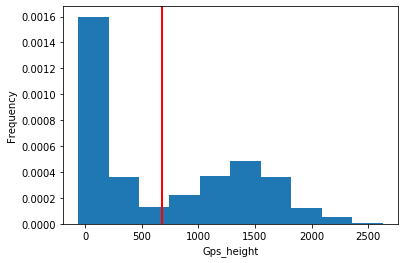

In [268]:
plt.hist(data['Gps_height'],density=1)

plt.xlabel("Gps_height")
plt.ylabel("Frequency")
plt.axvline(x=data['Gps_height'].mean(), linewidth=2, color = 'r') 
plt.show()

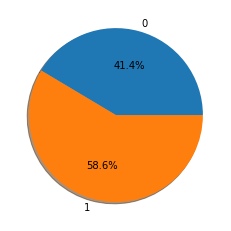

In [269]:
#Checking the Status
data.groupby('Status').size().plot(kind='pie', label="", autopct='%0.1f%%', shadow=True)

In [270]:
cat_cols

['Waterpoint_type',
 'Basin_name',
 'Village',
 'Regionname',
 'Wardname',
 'Public_meeting',
 'Organization_funding',
 'Scheme_management',
 'Permit',
 'Company_installed',
 'Management',
 'Management_group',
 'Extraction_type',
 'Extraction_type_group',
 'Extraction_type_class',
 'Payment',
 'Payment_type',
 'Water_quality',
 'Quality_group',
 'Quantity',
 'Quantity_group',
 'Source',
 'Source_type',
 'Source_class',
 'Waterpoint_type_group']

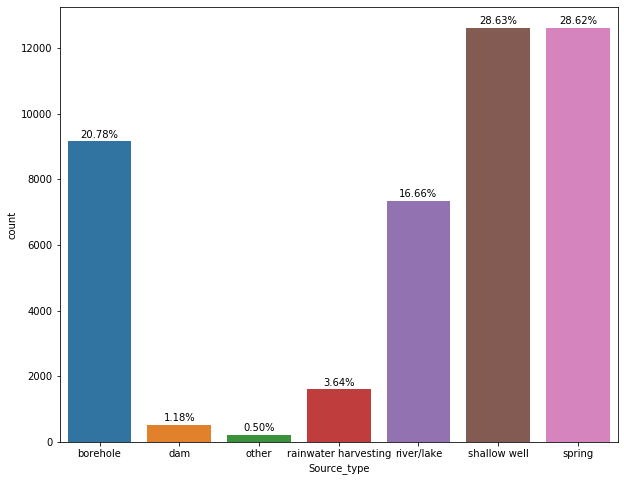

In [271]:
barplot("Source_type",data)

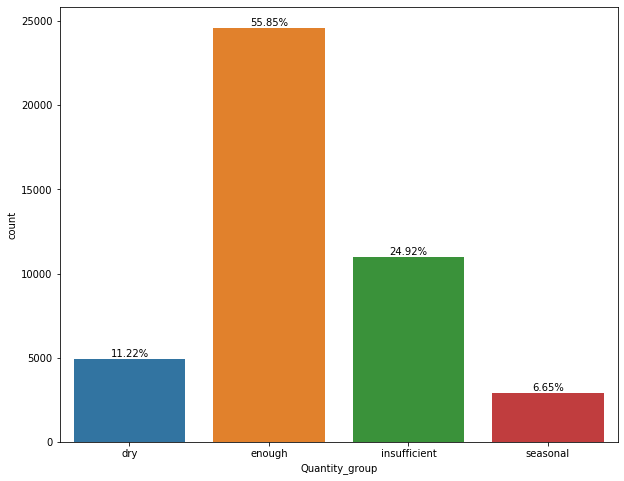

In [272]:
barplot("Quantity_group",data)

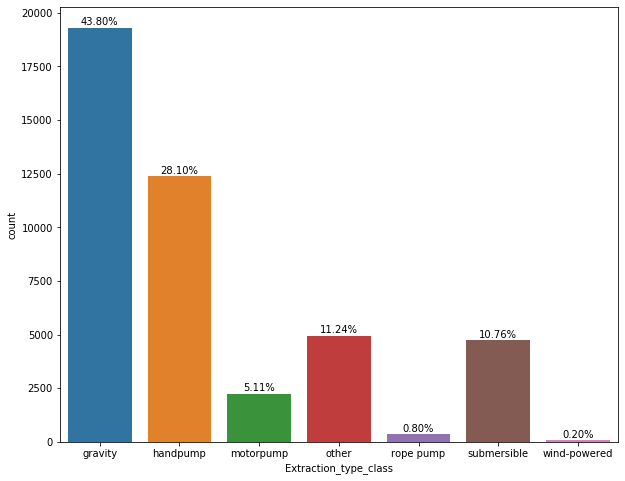

In [273]:
barplot("Extraction_type_class", data)

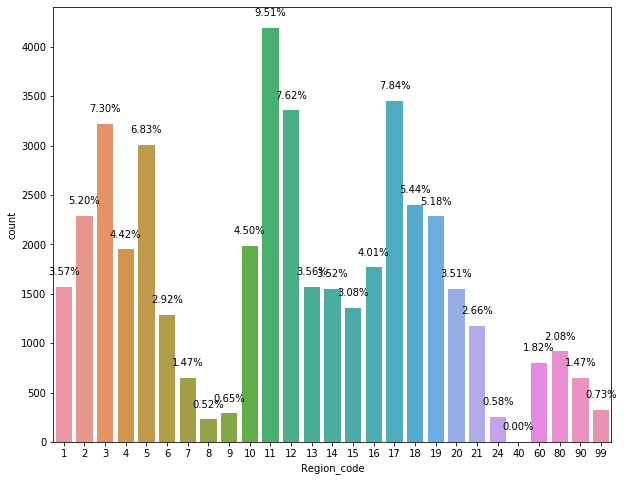

In [274]:
barplot("Region_code", data)

In [275]:
cat_cols_draw = ['Waterpoint_type_group', 'Management_group', 'Extraction_type_class','Payment', 'Water_quality', 'Source_class']

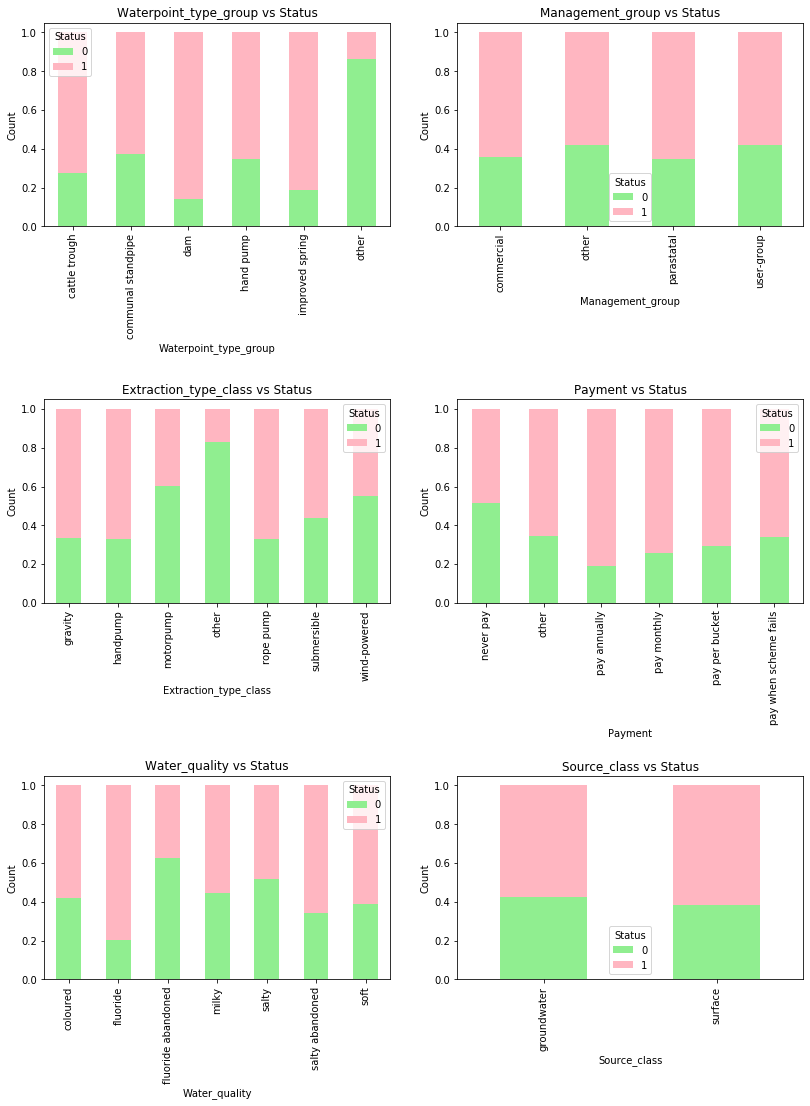

In [276]:
fig = plt.figure(figsize= (12,16))
for number, column in enumerate(cat_cols_draw):
    axes = fig.add_subplot(3, 2, number+1)
    fig.tight_layout(pad=3.0)
    axes.set_title(column.capitalize() + " vs Status")
    pd.crosstab(index = data[column], columns = data['Status'], normalize = 'index').plot(kind = 'bar', stacked = True, ax = axes, color = ['lightgreen','lightpink'])
    axes.set_xlabel(column.capitalize())
    plt.ylabel('Count')

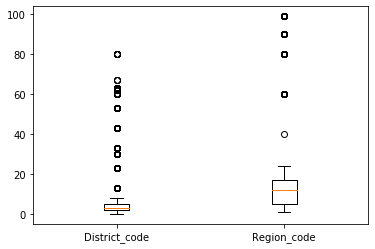

In [330]:
plt.boxplot(x=[data.District_code, data.Region_code],labels=['District_code', 'Region_code'])
plt.show()

In [277]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

## conda install -c anaconda statsmodels
import statsmodels.api as sm

In [278]:
def find_chi2_independence(cat_col, target, df, alpha=0.05):
    data = df[[target, cat_col]]
    tab = sm.stats.Table.from_data(data)
    tab = tab.table_orig.to_numpy()
    print(f"---------------{target} Vs {cat_col} Chi Square Test of Independence -------------------")
    print(f"\n Contingency table :\n")
    print(tab)
    
    stat, p, dof, expected = chi2_contingency(tab)
    print(f"\n Expected table :\n")
    print(expected)
    
    print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 

In [279]:
for col in cat_cols:
    find_chi2_independence(col, 'Status', data)

---------------Status Vs Waterpoint_type Chi Square Test of Independence -------------------

 Contingency table :

[[   27  6871  2548     1  4554   105  4154]
 [   72 14214  1768     6  8643   450   655]]

 Expected table :

[[4.10216030e+01 8.73677271e+03 1.78837615e+03 2.90051738e+00
  5.46830398e+03 2.29969592e+02 1.99265544e+03]
 [5.79783970e+01 1.23482273e+04 2.52762385e+03 4.09948262e+00
  7.72869602e+03 3.25030408e+02 2.81634456e+03]]
The p value returned = 0.0 and degrees of freedom returned = 6
significance(alpha) = 0.050
Dependent (reject H0)
---------------Status Vs Basin_name Chi Square Test of Independence -------------------

 Contingency table :

[[2209 1206  971 2068 3322 2487 1978 1970 2049]
 [3561 2684  820 2458 4075 4241 4102 1338 2529]]

 Expected table :

[[2390.85504221 1611.85894527  742.11809022 1875.39166742 3065.01815376
  2787.81156395 2519.30652628 1370.70164292 1896.93836798]
 [3379.14495779 2278.14105473 1048.88190978 2650.60833258 4331.98184624
  3940.1

##### Observation:
        Looks like all the categorical columns contribute for the Status

In [280]:
# Removing Id as the number of unique values are same as the number of observations
# Removing SchemeName as as almost 50 % data is missing
# Removing Water_quality as it matches with the Quality group 
# Removing Payment as it is similar to Payment_type
# Removing Quantity as it matches with Quantity_group
# Removing Organization_surveyed as it has no variance
cols_removed = ['Id', 'SchemeName', 'Water_quality', 'Payment', 'Quantity', 'Organization_surveyed']

In [281]:
data_cols_removed = data.drop(cols_removed, axis=1)

#### Target encoding Village

In [282]:
data_cols_removed[['Village', 'Status']].groupby(['Village'])['Status'].mean()

Village
village1        0.567474
village10       0.000000
village1000     0.404040
village10000    1.000000
village10001    0.000000
                  ...   
village9994     1.000000
village9996     1.000000
village9997     0.000000
village9998     0.000000
village9999     0.000000
Name: Status, Length: 16471, dtype: float64

In [283]:
encoded_target = data_cols_removed.groupby(['Village'])['Status'].mean().to_dict()
encoded_target

{'village1': 0.5674740484429066,
 'village10': 0.0,
 'village1000': 0.40404040404040403,
 'village10000': 1.0,
 'village10001': 0.0,
 'village10002': 0.5,
 'village10004': 0.0,
 'village10005': 0.0,
 'village10006': 0.0,
 'village10007': 0.0,
 'village10008': 0.0,
 'village10009': 0.0,
 'village1001': 1.0,
 'village10010': 0.0,
 'village10011': 0.0,
 'village10012': 0.0,
 'village10013': 0.0,
 'village10014': 1.0,
 'village10015': 0.0,
 'village10016': 0.0,
 'village10017': 0.0,
 'village10018': 0.0,
 'village10019': 0.0,
 'village1002': 0.0,
 'village10021': 0.0,
 'village10022': 0.0,
 'village10023': 0.0,
 'village10024': 0.0,
 'village10025': 1.0,
 'village10026': 0.0,
 'village10027': 0.25,
 'village10028': 0.0,
 'village10029': 0.0,
 'village1003': 0.0,
 'village10030': 0.5,
 'village10031': 0.0,
 'village10032': 0.0,
 'village10033': 0.1111111111111111,
 'village10034': 0.0,
 'village10035': 0.0,
 'village10036': 1.0,
 'village10037': 0.0,
 'village10039': 0.0,
 'village10041': 1

In [284]:
#Creating a separate attribute as Village_encoded and removing the Village attribute
data_cols_removed['Village_encoded'] = data_cols_removed.Village.map(encoded_target)
data_cols_removed_village = data_cols_removed.drop(['Village'], axis = 1)


In [285]:
data_cols_removed_village.columns

Index(['Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Regionname', 'Region_code', 'Wardname', 'District_code', 'Population',
       'Public_meeting', 'Organization_funding', 'Scheme_management', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment_type', 'Quality_group', 'Quantity_group', 'Source',
       'Source_type', 'Source_class', 'Waterpoint_type_group', 'Status',
       'Village_encoded'],
      dtype='object')

In [286]:
y = data_cols_removed_village["Status"]
X = data_cols_removed_village.drop('Status', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=123, stratify=y)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(35254, 27)
(8814, 27)
(35254,)
(8814,)


In [287]:
num_attr = X_train.select_dtypes(['int64', 'float64']).columns
num_attr

Index(['Amount_of_water', 'Gps_height', 'Region_code', 'District_code',
       'Population', 'Village_encoded'],
      dtype='object')

In [288]:
cat_attr = X_train.select_dtypes('category').columns
cat_attr

Index(['Waterpoint_type', 'Basin_name', 'Regionname', 'Wardname',
       'Public_meeting', 'Organization_funding', 'Scheme_management', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment_type', 'Quality_group', 'Quantity_group', 'Source',
       'Source_type', 'Source_class', 'Waterpoint_type_group'],
      dtype='object')

In [289]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])

In [290]:
#Method to get the classification report and the Confusion Matrix
def get_CR_CM(train_actual,train_predicted,test_actual,test_predicted):
    print('''
         ========================================
           CLASSIFICATION REPORT FOR TRAIN DATA
         ========================================
        ''')
    print(classification_report(train_actual, train_predicted, digits=4))

    print('''
             =============================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
             =============================================
            ''')
    print(classification_report(test_actual, test_predicted, digits=4))

    print('''
             ========================================
               Confusion Matrix FOR TRAIN DATA
             ========================================
            ''')
    print(confusion_matrix(train_actual, train_predicted))

    print('''
             =============================================
               Confusion matrix FOR VALIDATION DATA
             =============================================
            ''')
    print(confusion_matrix(test_actual, test_predicted))
    

In [291]:
## Method to get the scores for each model
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    get_CR_CM(train_actual,train_predicted,test_actual,test_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

## Model Building


### Logistic Regression

In [333]:
X_train.shape
y_train.shape

(35254,)

In [292]:
log_mod = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [293]:
log_mod.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Amount_of_water', 'Gps_height', 'Region_code', 'District_code',
       'Population', 'Village_encoded'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent...
       'Public_meeting', 'Organization_funding', 'Scheme_management', 'Permit',
       'Company_installed', 'Management', 'Management_g

In [294]:
y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_val)

### Evaluating Model Performance

In [295]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9370    0.9259    0.9314     14608
           1     0.9480    0.9560    0.9520     20646

    accuracy                         0.9435     35254
   macro avg     0.9425    0.9410    0.9417     35254
weighted avg     0.9435    0.9435    0.9435     35254


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9221    0.9113    0.9167      3652
           1     0.9378    0.9456    0.9416      5162

    accuracy                         0.9314      8814
   macro avg     0.9299    0.9284    0.9292      8814
weighted avg     0.9313    0.9314    0.9313      8814


               Confusion Matrix FOR TRAIN DATA
            
[[13526  1082]
 [  909 19737]]

               Confusion matrix FOR VALIDATION DATA
            
[[3328  324]
 [ 281 4881]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.943524,0.955972,0.948028,0.951984,0.931359,0.945564,0.937752,0.941642


### Decision Tree Classifier


In [296]:
# Create Decision Tree classifer object with pipeline
dt_mod = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(random_state=123))])

In [297]:
# set of parameters to test
dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],"classifier__min_samples_leaf": [1, 5, 10]}

In [298]:
# Using GridSearchCV 
dt_mod_grid = GridSearchCV(dt_mod, param_grid=dt_param_grid, cv=5,scoring='accuracy')

In [299]:
dt_mod_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Amount_of_water', 'Gps_height', 'Region_code', 'District_code',
       'Population', 'Village_encoded'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                 

In [300]:
y_pred_train = dt_mod_grid.predict(X_train)
y_pred_val = dt_mod_grid.predict(X_val)

In [301]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTreeWithGridSearch",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9471    0.8547    0.8986     14608
           1     0.9039    0.9662    0.9340     20646

    accuracy                         0.9200     35254
   macro avg     0.9255    0.9105    0.9163     35254
weighted avg     0.9218    0.9200    0.9193     35254


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9218    0.8461    0.8824      3652
           1     0.8971    0.9492    0.9224      5162

    accuracy                         0.9065      8814
   macro avg     0.9095    0.8977    0.9024      8814
weighted avg     0.9074    0.9065    0.9058      8814


               Confusion Matrix FOR TRAIN DATA
            
[[12486  2122]
 [  697 19949]]

               Confusion matrix FOR VALIDATION DATA
            
[[3090  562]
 [ 262 4900]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.943524,0.955972,0.948028,0.951984,0.931359,0.945564,0.937752,0.941642
1,DecisionTreeWithGridSearch,0.920037,0.966240,0.903856,0.934008,0.906512,0.949244,0.897107,0.922440


### Decision Tree with Randomized Search

In [302]:
dt_mod = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(random_state=123))])

In [303]:
# set of parameters to test
dt_random_param_grid = {'classifier__max_leaf_nodes': np.random.normal(loc=5, scale=1, size=5).astype(int), 'classifier__max_depth': np.random.uniform(2,5,4).astype(int), 
                 "classifier__min_samples_split": np.random.uniform(2, 6, 5).astype(int)}

In [304]:
#Using Randomized Search
dt_mod_random = RandomizedSearchCV(estimator=dt_mod, param_distributions=dt_random_param_grid, n_iter=600, cv=5, scoring='accuracy', n_jobs=-1)
dt_mod_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Amount_of_water', 'Gps_height', 'Region_code', 'District_code',
       'Population', 'Village_encoded'],
      dtype='object')),
                                                                              ('cat',
                                                                

In [305]:
dt_mod_random_best = dt_mod_random.best_estimator_

In [306]:
y_pred_train = dt_mod_random_best.predict(X_train)
y_pred_val = dt_mod_random_best.predict(X_val)

In [307]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree_RandomizedSearch",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9839    0.5736    0.7247     14608
           1     0.7670    0.9934    0.8657     20646

    accuracy                         0.8194     35254
   macro avg     0.8755    0.7835    0.7952     35254
weighted avg     0.8569    0.8194    0.8072     35254


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9784    0.5693    0.7198      3652
           1     0.7648    0.9911    0.8634      5162

    accuracy                         0.8163      8814
   macro avg     0.8716    0.7802    0.7916      8814
weighted avg     0.8533    0.8163    0.8039      8814


               Confusion Matrix FOR TRAIN DATA
            
[[ 8379  6229]
 [  137 20509]]

               Confusion matrix FOR VALIDATION DATA
            
[[2079 1573]
 [  46 5116]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.943524,0.955972,0.948028,0.951984,0.931359,0.945564,0.937752,0.941642
1,DecisionTreeWithGridSearch,0.920037,0.966240,0.903856,0.934008,0.906512,0.949244,0.897107,0.922440
2,DecisionTree_RandomizedSearch,0.819425,0.993364,0.767036,0.865651,0.816315,0.991089,0.764838,0.863387


### SVM

In [308]:
#Creating SVM model with GridSearch
svm_mod = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])

svm_param_grid = {'classifier__C': [50,90], 'classifier__gamma': [0.008, 0.001],
                 "classifier__kernel": ['rbf']}

svm_grid = GridSearchCV(svm_mod, param_grid= svm_param_grid, cv= 5)

svm_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Amount_of_water', 'Gps_height', 'Region_code', 'District_code',
       'Population', 'Village_encoded'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                 

In [309]:
y_pred_train = svm_grid.predict(X_train)
y_pred_val = svm_grid.predict(X_val)

In [310]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"SVM",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9564    0.9588    0.9576     14608
           1     0.9708    0.9690    0.9699     20646

    accuracy                         0.9648     35254
   macro avg     0.9636    0.9639    0.9637     35254
weighted avg     0.9648    0.9648    0.9648     35254


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9225    0.9255    0.9240      3652
           1     0.9472    0.9450    0.9461      5162

    accuracy                         0.9369      8814
   macro avg     0.9348    0.9353    0.9350      8814
weighted avg     0.9370    0.9369    0.9369      8814


               Confusion Matrix FOR TRAIN DATA
            
[[14006   602]
 [  639 20007]]

               Confusion matrix FOR VALIDATION DATA
            
[[3380  272]
 [ 284 4878]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.943524,0.955972,0.948028,0.951984,0.931359,0.945564,0.937752,0.941642
1,DecisionTreeWithGridSearch,0.920037,0.966240,0.903856,0.934008,0.906512,0.949244,0.897107,0.922440
2,DecisionTree_RandomizedSearch,0.819425,0.993364,0.767036,0.865651,0.816315,0.991089,0.764838,0.863387
3,SVM,0.964798,0.969050,0.970789,0.969919,0.936919,0.944983,0.947184,0.946082


### RandomForestClassifier


In [311]:
rf_mod = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=123))])

In [315]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=143)

param_grid = {"classifier__n_estimators" : [50, 100],
              "classifier__max_depth" : [5,8],
              "classifier__max_features" : [3, 5],
              "classifier__min_samples_leaf" : [4, 6]}

rf_grid = GridSearchCV(rf_mod, param_grid=param_grid, cv=kfold)

In [316]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=143, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Amount_of_water', 'Gps_height', 'Region_code', 'District_code',
       'Population', 'Village_encoded'],
      dtyp...
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment_type', 'Quality_group', 'Quantity_group', 'Source',
      

In [317]:
pl = rf_grid.best_estimator_.named_steps['preprocessor']
catpl = pl.named_transformers_['cat']
ohe = catpl.named_steps['onehot']
ohe_features = ohe.get_feature_names()
print(ohe_features)

['x0_cattle trough' 'x0_communal standpipe'
 'x0_communal standpipe multiple' ... 'x20_hand pump'
 'x20_improved spring' 'x20_other']


In [321]:
num_attr=list(num_attr)
num_attr.extend(ohe_features)
num_attr

['Amount_of_water',
 'Gps_height',
 'Region_code',
 'District_code',
 'Population',
 'Village_encoded',
 'x0_cattle trough',
 'x0_communal standpipe',
 'x0_communal standpipe multiple',
 'x0_dam',
 'x0_hand pump',
 'x0_improved spring',
 'x0_other',
 'x1_basin1',
 'x1_basin2',
 'x1_basin3',
 'x1_basin4',
 'x1_basin5',
 'x1_basin6',
 'x1_basin7',
 'x1_basin8',
 'x1_basin9',
 'x2_region1',
 'x2_region10',
 'x2_region11',
 'x2_region12',
 'x2_region13',
 'x2_region14',
 'x2_region15',
 'x2_region16',
 'x2_region17',
 'x2_region18',
 'x2_region19',
 'x2_region2',
 'x2_region20',
 'x2_region21',
 'x2_region3',
 'x2_region4',
 'x2_region5',
 'x2_region6',
 'x2_region7',
 'x2_region8',
 'x2_region9',
 'x3_ward1',
 'x3_ward10',
 'x3_ward100',
 'x3_ward1000',
 'x3_ward1001',
 'x3_ward1002',
 'x3_ward1003',
 'x3_ward1004',
 'x3_ward1005',
 'x3_ward1006',
 'x3_ward1007',
 'x3_ward1008',
 'x3_ward1009',
 'x3_ward101',
 'x3_ward1010',
 'x3_ward1011',
 'x3_ward1012',
 'x3_ward1013',
 'x3_ward1014',


In [322]:
feature_imp = rf_grid.best_estimator_.steps[1][1].feature_importances_
print(feature_imp)

[0.02534144 0.02630261 0.00149367 ... 0.00259896 0.         0.        ]


In [323]:
feature_imp_df = pd.DataFrame(feature_imp.tolist(),index =num_attr,columns=['var_imp'])
feature_imp_df = feature_imp_df.sort_values(by="var_imp",ascending=False)
feature_imp_df.head(8)

,var_imp
Gps_height,0.026303
Amount_of_water,0.025341
Village_encoded,0.024280
x8_Iorg788,0.024276
x3_ward1232,0.023810
x3_ward1923,0.023810
x5_Org_67,0.023810
x11_other,0.023401


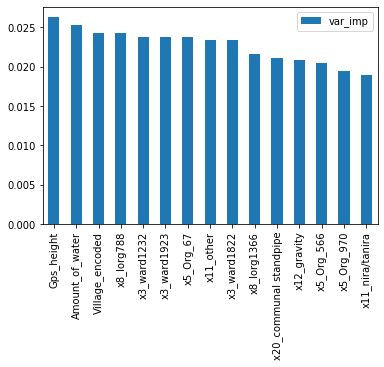

In [324]:
feature_imp_df[:15].plot(kind='bar')

In [325]:
y_pred_train = rf_grid.predict(X_train)
y_pred_val = rf_grid.predict(X_val)

In [326]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"RandomForestWithGrid",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     14608
           1     0.5856    1.0000    0.7387     20646

    accuracy                         0.5856     35254
   macro avg     0.2928    0.5000    0.3693     35254
weighted avg     0.3430    0.5856    0.4326     35254


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      3652
           1     0.5857    1.0000    0.7387      5162

    accuracy                         0.5857      8814
   macro avg     0.2928    0.5000    0.3693      8814
weighted avg     0.3430    0.5857    0.4326      8814


               Confusion Matrix FOR TRAIN DATA
            
[[    0 14608]
 [    0 20646]]

               Confusion matrix FOR VALIDATION DATA
            
[[   0 3652]
 [   0 5162]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.943524,0.955972,0.948028,0.951984,0.931359,0.945564,0.937752,0.941642
1,DecisionTreeWithGridSearch,0.920037,0.966240,0.903856,0.934008,0.906512,0.949244,0.897107,0.922440
2,DecisionTree_RandomizedSearch,0.819425,0.993364,0.767036,0.865651,0.816315,0.991089,0.764838,0.863387
3,SVM,0.964798,0.969050,0.970789,0.969919,0.936919,0.944983,0.947184,0.946082
4,RandomForestWithGrid,0.585636,1.000000,0.585636,0.738676,0.585659,1.000000,0.585659,0.738695


### Removing village_encoded and keeping village

In [592]:
y = data_cols_removed["Status"]
X = data_cols_removed.drop(['Status', 'Village_encoded'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=123, stratify=y)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(35254, 27)
(8814, 27)
(35254,)
(8814,)


In [593]:
num_attr = list(X_train.select_dtypes(['int64', 'float64']).columns)
num_attr

['Amount_of_water', 'Gps_height', 'Region_code', 'District_code', 'Population']

In [594]:
#num_attr.remove('Village_encoded')

In [595]:
num_attr

['Amount_of_water', 'Gps_height', 'Region_code', 'District_code', 'Population']

In [596]:
cat_attr = list(X_train.select_dtypes('category').columns)
cat_attr

['Waterpoint_type',
 'Basin_name',
 'Village',
 'Regionname',
 'Wardname',
 'Public_meeting',
 'Organization_funding',
 'Scheme_management',
 'Permit',
 'Company_installed',
 'Management',
 'Management_group',
 'Extraction_type',
 'Extraction_type_group',
 'Extraction_type_class',
 'Payment_type',
 'Quality_group',
 'Quantity_group',
 'Source',
 'Source_type',
 'Source_class',
 'Waterpoint_type_group']

In [597]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])

In [598]:
log_mod1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [599]:
log_mod1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Amount_of_water',
                                                   'Gps_height', 'Region_code',
                                                   'District_code',
                                                   'Population']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                    

In [600]:
y_pred_train = log_mod1.predict(X_train)
y_pred_val = log_mod1.predict(X_val)

In [601]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegressionWithVilage",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9175    0.9112    0.9143     14608
           1     0.9375    0.9420    0.9397     20646

    accuracy                         0.9293     35254
   macro avg     0.9275    0.9266    0.9270     35254
weighted avg     0.9292    0.9293    0.9292     35254


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8763    0.8595    0.8678      3652
           1     0.9019    0.9142    0.9080      5162

    accuracy                         0.8915      8814
   macro avg     0.8891    0.8869    0.8879      8814
weighted avg     0.8913    0.8915    0.8914      8814


               Confusion Matrix FOR TRAIN DATA
            
[[13311  1297]
 [ 1197 19449]]

               Confusion matrix FOR VALIDATION DATA
            
[[3139  513]
 [ 443 4719]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.943524,0.955972,0.948028,0.951984,0.931359,0.945564,0.937752,0.941642
1,LogisticRegressionWithVilage,0.929256,0.942023,0.937482,0.939747,0.891536,0.914181,0.901950,0.908024
2,LogisticRegressionWithVilage,0.929256,0.942023,0.937482,0.939747,0.891536,0.914181,0.901950,0.908024


### TEST DATA PREDICTION

In [100]:
test_data = pd.read_csv("testdataupdated-1617172320262.csv", na_values=['unknown', '#', '$'])

In [101]:
Id = test_data['Id']

In [102]:
Id

0        31547
1        34980
2        54744
3        20884
4        42440
         ...  
11010    50818
11011    58478
11012    51919
11013     4475
11014    35884
Name: Id, Length: 11015, dtype: int64

In [103]:
type(Id)

pandas.core.series.Series

In [104]:
test_data.shape

(11015, 33)

In [105]:
test_data.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,31547,0.0,1018,hand pump,basin2,village4319,region5,10,ward1777,4,...,pay when scheme fails,on failure,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump
1,34980,0.0,356,hand pump,basin8,village2412,region5,10,ward493,1,...,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump
2,54744,500.0,265,hand pump,basin7,village19173,region2,5,ward1546,3,...,pay monthly,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump
3,20884,0.0,1203,communal standpipe multiple,basin5,village1692,region18,20,ward643,6,...,NaN,NaN,soft,good,enough,enough,lake,river/lake,surface,communal standpipe
4,42440,0.0,0,communal standpipe,basin2,village17574,region19,12,ward1356,3,...,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe


In [106]:
test_data.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting            object
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                    object
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source                    object
Source_typ

In [107]:
catcols = test_data.select_dtypes("object").columns

In [108]:
test_data[catcols]

,Waterpoint_type,Basin_name,Village,Regionname,Wardname,Public_meeting,Organization_funding,Organization_surveyed,Scheme_management,SchemeName,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,hand pump,basin2,village4319,region5,ward1777,True,Org_1880,DataConsultantLtd,VWC,NaN,...,pay when scheme fails,on failure,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump
1,hand pump,basin8,village2412,region5,ward493,False,Org_1233,DataConsultantLtd,VWC,NaN,...,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump
2,hand pump,basin7,village19173,region2,ward1546,True,Iorg504,DataConsultantLtd,NaN,NaN,...,pay monthly,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump
3,communal standpipe multiple,basin5,village1692,region18,ward643,NaN,Org_1873,DataConsultantLtd,VWC,SCM2470,...,NaN,NaN,soft,good,enough,enough,lake,river/lake,surface,communal standpipe
4,communal standpipe,basin2,village17574,region19,ward1356,True,Iorg891,DataConsultantLtd,VWC,SCM365,...,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,communal standpipe,basin1,village18251,region11,ward1020,True,Org_938,DataConsultantLtd,VWC,SCM2204,...,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe
11011,communal standpipe,basin2,village2038,region12,ward1796,True,Iorg468,DataConsultantLtd,VWC,SCM47,...,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe
11012,communal standpipe,basin7,village17251,region19,ward1342,False,Iorg1359,DataConsultantLtd,VWC,NaN,...,pay when scheme fails,on failure,soft,good,enough,enough,river,river/lake,surface,communal standpipe
11013,communal standpipe,basin4,village13480,region8,ward1311,False,Org_1409,DataConsultantLtd,VWC,SCM2158,...,never pay,never pay,soft,good,enough,enough,dam,dam,surface,communal standpipe


In [109]:
test_data[catcols] = test_data[catcols].astype('category')

In [110]:
cols_removed

['Id',
 'SchemeName',
 'Water_quality',
 'Payment',
 'Quantity',
 'Organization_surveyed',
 'Management',
 'Extraction_type',
 'Extraction_type_group',
 'Source',
 'Source_type']

In [111]:
data_cols_removed_test = test_data.drop(cols_removed, axis=1)

In [112]:
data_cols_removed_test.shape

(11015, 22)

In [113]:
data_cols_removed_test.dtypes

Amount_of_water           float64
Gps_height                  int64
Waterpoint_type          category
Basin_name               category
Village                  category
Regionname               category
Region_code                 int64
Wardname                 category
District_code               int64
Population                  int64
Public_meeting           category
Organization_funding     category
Scheme_management        category
Permit                   category
Company_installed        category
Management_group         category
Extraction_type_class    category
Payment_type             category
Quality_group            category
Quantity_group           category
Source_class             category
Waterpoint_type_group    category
dtype: object

In [114]:
data_cols_removed_test.isnull().sum()

Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Village                     0
Regionname                  0
Region_code                 0
Wardname                    0
District_code               0
Population                  0
Public_meeting            653
Organization_funding        0
Scheme_management         724
Permit                    529
Company_installed           0
Management_group          113
Extraction_type_class       0
Payment_type             1601
Quality_group             396
Quantity_group            172
Source_class               54
Waterpoint_type_group       0
dtype: int64

### Village Encoding

In [115]:
data_cols_removed_test['Village_encoded'] = data_cols_removed_test.Village.map(encoded_target)

In [116]:
data_cols_removed_test.drop(['Village'], axis = 1, inplace = True)

In [117]:
cat_attr = list(data_cols_removed_test.select_dtypes("category").columns)
num_attr = list(data_cols_removed_test.columns.difference(cat_attr))

In [118]:
cat_attr

['Waterpoint_type',
 'Basin_name',
 'Regionname',
 'Wardname',
 'Public_meeting',
 'Organization_funding',
 'Scheme_management',
 'Permit',
 'Company_installed',
 'Management_group',
 'Extraction_type_class',
 'Payment_type',
 'Quality_group',
 'Quantity_group',
 'Source_class',
 'Waterpoint_type_group']

In [119]:
num_attr

['Amount_of_water',
 'District_code',
 'Gps_height',
 'Population',
 'Region_code',
 'Village_encoded']

In [120]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])

In [121]:
X_train.shape

(35254, 22)

In [122]:
train_pred = dt_mod_random_best.predict(X_train)
test_pred = dt_mod_random_best.predict(data_cols_removed_test)

test_pred

array([0, 1, 1, ..., 1, 1, 1])

In [123]:
type(test_pred)

numpy.ndarray

In [124]:
score_test = list(zip(Id.to_numpy(),test_pred))

In [125]:
test_scores = pd.DataFrame(score_test, columns=['Id','Status'])

In [126]:
os.chdir('/home/4022b94')

In [127]:
test_scores.to_csv('Arpita_Banerjee_B94_MiTH.csv', index=False)

### Insights
#### Excel Sheet Analysis
#### Metric : Accuracy
#### Best Model : 
    : According to validation data is SVM
    : According to test data is Logistic Regression

# Thank You !!!